In [ ]:
#https://pypi.python.org/pypi/libarchive
!pip install -U scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

     |████████████████████████████████| 993 kB 26.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=085b26840471d94747907f2beae1ad1af839b78179030e8175910fb747332267
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [12]:
# Menentukan Jumlah Varibel
permintaan = ctrl.Antecedent(np.arange(0, 6000, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 6000, 1), 'persediaan')
produksi = ctrl.Consequent(np.arange(0, 6000, 1), 'produksi')

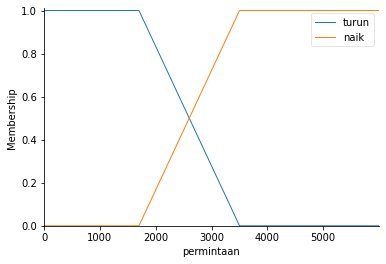

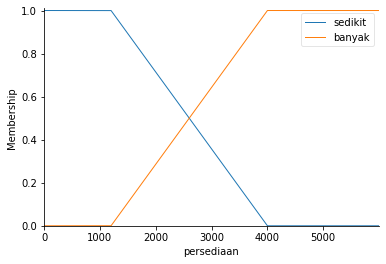

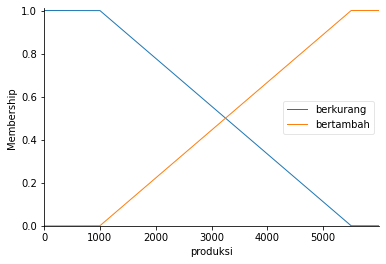

In [13]:
# Membership function
permintaan['turun'] = fuzz.trapmf(permintaan.universe,[0,0,1700,3500])
permintaan['naik'] = fuzz.trapmf(permintaan.universe,[1700,3500,6000,6000])

persediaan['sedikit'] = fuzz.trapmf(persediaan.universe,[0,0,1200,4000])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe,[1200,4000,6000,6000])

produksi['berkurang'] = fuzz.trapmf(produksi.universe,[0,0,1000,5500])
produksi['bertambah'] = fuzz.trapmf(produksi.universe,[1000,5500,6000,6000])

permintaan.view()
persediaan.view()
produksi.view()


In [ ]:
#Aturan
rule1 = ctrl.Rule(permintaan['turun'] & persediaan['banyak'], produksi['berkurang'])
rule2 = ctrl.Rule(permintaan['turun'] & persediaan['sedikit'], produksi['berkurang'])
rule3 = ctrl.Rule(permintaan['naik'] & persediaan['banyak'], produksi['bertambah'])
rule4 = ctrl.Rule(permintaan['naik'] & persediaan['sedikit'], produksi['bertambah'])


In [ ]:
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

1884.6153846153754


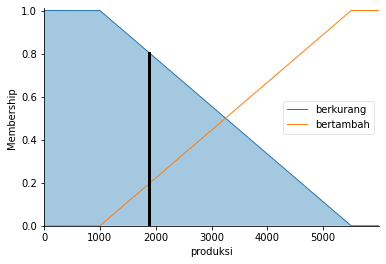

In [ ]:
hasil_produksi= ctrl.ControlSystemSimulation(produksi_ctrl)

# Input: nilai permintaan dan nilai persediaan
hasil_produksi.input['permintaan'] = 1500
hasil_produksi.input['persediaan'] = 500


hasil_produksi.compute()
print(hasil_produksi.output['produksi'])

produksi.view(sim=hasil_produksi)

plt.show()